In [1]:
#import
import pandas as pd
import numpy as np
import tensorflow as tf


In [4]:
#sigmoid function   
def sigmoid(x):
    return 1/ (1+np.exp(-x))


print(sigmoid(10))


0.9999546021312976


In [5]:
#tanh function

def tanh(x):
    numerator = 1-np.exp(-2*x)
    denominator = 1+np.exp(-2*x)
    return numerator/denominator



print(tanh(45))


1.0


In [8]:
#relu function
def RelU(x):
    if x < 0:
        return 0
    else:
        return x


print(RelU(100))
print(RelU(-100))

100
0


In [9]:
#Leaky Relu Function
def leakyReLU(x, alpha=0.01):
    if x < 0:
        return alpha * x
    else:
        return x


print(leakyReLU(-1000))

-10.0


In [11]:
#ELU

def ELU(x, alpha=1):
    if x < 0:
        return alpha * (np.exp(x) - 1)
    else:
        return x


print(ELU(-100))
print(ELU(100))

-1.0
100


In [12]:
#Swish Function
def swish(x, beta):
    return 2 * x * sigmoid(beta * x)


print(swish(1, 1))

1.4621171572600098


In [18]:
#Softmax Function

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)


print(softmax(np.array([0.5,1])))

[0.37754067 0.62245933]


In [33]:
#Forward Propagation in ANN
import numpy as np

# Define the weights and biases
Wxh = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])  # Shape (input_dim, hidden_dim)
bh = np.array([1, 1, 1])  # Shape (hidden_dim,)
Why = np.array([[1, 2], [3, 4], [5, 6]])  # Shape (hidden_dim, output_dim)
by = np.array([1, 1])  # Shape (output_dim,)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_prop(x):
    z1 = np.dot(x, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    return y_hat,z1,a1,z2

print(forward_prop(np.array([1, 2, 3, 4, 5])))






(array([0.9999546 , 0.99999774]), array([136, 151, 166]), array([1., 1., 1.]), array([10., 13.]))


In [38]:
import numpy as np

# Define the sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Forward propagation function
def forward_prop(X):
    z1 = np.dot(X, Wxh) + bh 
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by 
    y_hat = sigmoid(z2)
    return y_hat, z1, a1, z2

# Backward propagation function
def backward_prop(y_hat, z1, a1, z2, Wxh, Why, X, y, alpha):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2)) 
    dJ_dWhy = np.dot(a1.T, delta2)  

    # Compute delta for hidden layer
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1) 
    dJ_dWxh = np.dot(X.T, delta1) 
    
    # Update weights
    Wxh -= alpha * dJ_dWxh
    Why -= alpha * dJ_dWhy

    return Wxh, Why

# Initialize weights and biases
Wxh = np.array([[0.1, 0.2],
                [0.3, 0.4],
                [0.5, 0.6]])  
bh = np.array([0.1, 0.2]) 

Why = np.array([[0.1],
                [0.2]])  

by = np.array([0.1])  

# Example input and true labels
x = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

y = np.array([[0],
              [1],
              [0]])

alpha = 0.001

# Perform forward propagation
y_hat, z1, a1, z2 = forward_prop(x)

# Perform backward propagation
Wxh, Why = backward_prop(y_hat, z1, a1, z2, Wxh, Why, x, y, alpha)

print("Updated Wxh:", Wxh)
print("Updated Why:", Why)


Updated Wxh: [[0.09999854 0.19999757]
 [0.29999815 0.39999684]
 [0.49999775 0.59999612]]
Updated Why: [[0.0998865 ]
 [0.19987754]]


Text(0, 0.5, 'Cost')

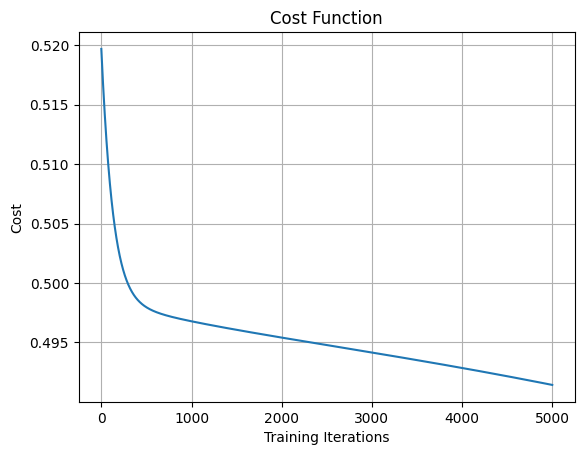

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[0,1], [1,0], [1,1], [0,0]])
y = np.array([[1], [1], [0], [0]])

num_input = 2
num_hidden = 5
num_output = 1

Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
  
def sigmoid_derivative(z):
    return np.exp(-z) / (1 + np.exp(-z))**2
  
def forward_prop(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    
    return z1, a1, z2, y_hat
  
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    
    return dJ_dWxh, dJ_dWhy
  
def cost_function(y, y_hat):
    J = 0.5 * sum((y - y_hat)**2)
    return J

alpha = 0.01
num_iterations = 5000

cost = []

for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)
    
    # update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    # compute cost
    c = cost_function(y, y_hat)
    
    cost.append(c)
    
plt.grid()
plt.plot(range(num_iterations), cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')